# Nickel Concentration as a function of radius

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

## Create master list of particles

In [2]:
plotting_list = [] # This is the list of tuples to be plotted

# Create a list containing 4 empty lists (one for each i)
indexlists = [[] for _ in range(4)]

## Collect all the spectra folders into one list

In [3]:
def find_spectra_folders(parent_folder):
    spectra_folders = []
    for root, dirs, files in os.walk(parent_folder):
        for d in dirs:
            if d.startswith("Spectra"):
                spectra_folders.append(os.path.join(root, d))
    return spectra_folders

# Path to your folder
folder_path = r"C:\PhenomData\NickelSpheres\Segmentation Project\Testing\Image Chain Tests\Test5\Run_2025-08-12_16-16-30"
spectra_folders = find_spectra_folders(folder_path)


## Given a Particle spectra folder, append all the spectra to the master list of particles

In [4]:

for folder_path in spectra_folders:
    # Find all .npy files in the folder
    npy_files = glob.glob(os.path.join(folder_path, "*.npy"))

    # Sort files by modification time (oldest first)
    npy_files.sort(key=os.path.getmtime)

    # For each numpy file, compute the nickel peak counts, along with the total counts. Then find their ratio. This ratio is the nickel concentration
    for i, npy_file in enumerate(npy_files):
        if i > 3:
            break
        else:
            array = np.load(npy_file)
            total_counts = np.sum(array)
            # print(np.shape(array))
            # print(f'total counts = {total_counts}')
            nickel_peak_sum = np.sum(array[770:790])
            nickel_concentration = nickel_peak_sum / total_counts
            # print(f'nickel concentration = {nickel_concentration}')
            datapoint = (i, nickel_concentration)
            indexlists[i].append(nickel_concentration)
            plotting_list.append(datapoint)

    # print(tuples_list)

## Plot the nickel concentration as a function of radius

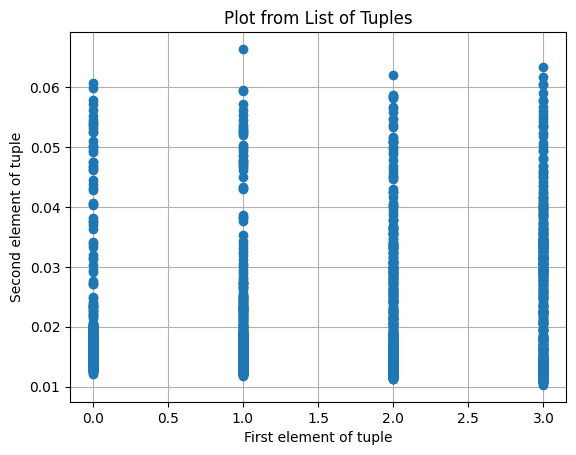

0.018560240223318463
0.01886257838965935
0.020788819769217478
0.023315442832559527


In [5]:
x, y = zip(*plotting_list)

plt.plot(x, y, marker='o', linestyle='')  # dots only
plt.xlabel("First element of tuple")
plt.ylabel("Second element of tuple")
plt.title("Plot from List of Tuples")
plt.grid(True)
plt.show()
average0 = sum(indexlists[0]) / len(indexlists[0])
average1 = sum(indexlists[1]) / len(indexlists[1])
average2 = sum(indexlists[2]) / len(indexlists[2])
average3 = sum(indexlists[3]) / len(indexlists[3])
print(average0)
print(average1)
print(average2)
print(average3)

## Plot the number of particles as a function of radius

<class 'numpy.ndarray'>


(array([0.07309186, 0.1608021 , 0.14618373, 0.26313071, 0.4239328 ,
        0.40931443, 0.35084094, 0.55549816, 0.43855118, 0.5847349 ,
        0.61397165, 0.745537  , 0.45316955, 0.48240629, 0.46778792,
        0.27774908, 0.23389396, 0.19003884, 0.07309186, 0.10232861,
        0.04385512, 0.05847349, 0.02923675, 0.04385512, 0.07309186,
        0.        , 0.        , 0.        , 0.01461837, 0.01461837]),
 array([4.73276891, 4.86930996, 5.00585102, 5.14239207, 5.27893312,
        5.41547418, 5.55201523, 5.68855628, 5.82509734, 5.96163839,
        6.09817944, 6.2347205 , 6.37126155, 6.5078026 , 6.64434366,
        6.78088471, 6.91742576, 7.05396682, 7.19050787, 7.32704892,
        7.46358998, 7.60013103, 7.73667208, 7.87321314, 8.00975419,
        8.14629524, 8.2828363 , 8.41937735, 8.5559184 , 8.69245946,
        8.82900051]),
 <BarContainer object of 30 artists>)

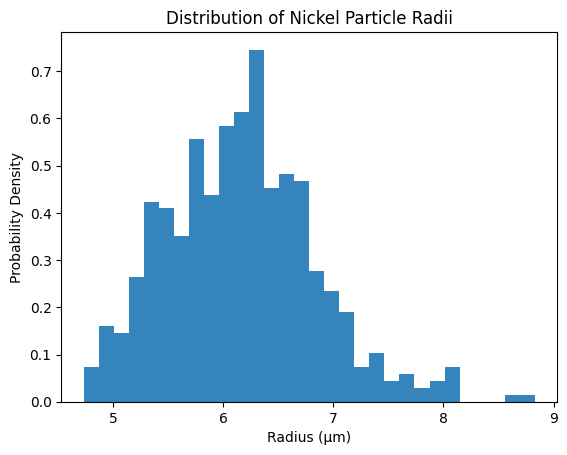

In [63]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
sys.path.append(r"C:\Users\labuser\Downloads\PyPhenom (2.1)\PyPhenom\Jacques_Argonne_Internship\Phenom Repositories\Phenom-Env_V2\Phenom")
from ParticleImageSegmentationLibrary import convert_micrometers_to_pixels

# Collect all the particle metadata folders
def find_particle_folders(parent_folder):
    particle_folders = []
    for root, dirs, files in os.walk(parent_folder):
        for d in dirs:
            if d.startswith("Particle_"):
                particle_folders.append(os.path.join(root, d))
    return particle_folders


# Path to your folder
folder_path = r"C:\PhenomData\NickelSpheres\Segmentation Project\Testing\Image Chain Tests\Test5\500_particles"
particle_folders = find_particle_folders(folder_path)

# Find all the metadata files in the particle folders and append their radii to a list
radii = []
for folder in particle_folders:
    # Change working directory to the specified folder
    os.chdir(folder)

    # Load the JSON file
    with open("metadata.json", "r") as f:
        data = json.load(f)

    if isinstance(data, dict):
        radius = data["radius"]
        radii.append(radius)
        # print(radius)


# Convert radii to micrometers
# for radius in radii:
#     radius = radius * 10e-6 * (256 / 6.24e-5)
radii_array = np.array(radii)
print(type(radii_array))
radii_array = radii_array * (6.24e-5 / 1024) * 1e6
# Plot the histogram

plt.title("Distribution of Nickel Particle Radii")
plt.ylabel("Probability Density")
plt.xlabel(u"Radius (\u03bcm)")
plt.hist(radii_array, bins=30, density=True, alpha=0.9)    

In [58]:
import numpy as np

# Your function
def convert_pixels_to_micrometers(pixel_value, image, image_horizontal_field_width):
    return pixel_value * (image_horizontal_field_width / np.shape(image)[0]) * 1e6

# Test
if __name__ == "__main__":
    # Fake image (512x512 pixels)
    image = np.zeros((1024, 1024))

    # Example inputs
    pixel_value = 99   # e.g. 50 pixels
    field_width_meters = 6.24e-5  # 50 micrometers in meters

    result = convert_pixels_to_micrometers(pixel_value, image, field_width_meters)
    print(f"{pixel_value} pixels corresponds to {result:.2f} µm")

99 pixels corresponds to 6.03 µm
